In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os    
import json
import statistics
from sklearn.preprocessing import RobustScaler

from scipy.stats import entropy

In [26]:
data_filenames = [file for file in os.listdir('.') if 'pkl' in file]
df_datas = [pd.read_pickle(file) for file in data_filenames]

for index, df in enumerate(df_datas):
    df['graph_type'] = data_filenames[index].split('.')[0]

df_joined = pd.concat(df_datas)


In [27]:
df_joined['State'].max()

0.27424242424242423

In [28]:
#1/df_joined[(df_joined['State']>0) & (df_joined['graph_type']=='scalefree')]['State'].min()


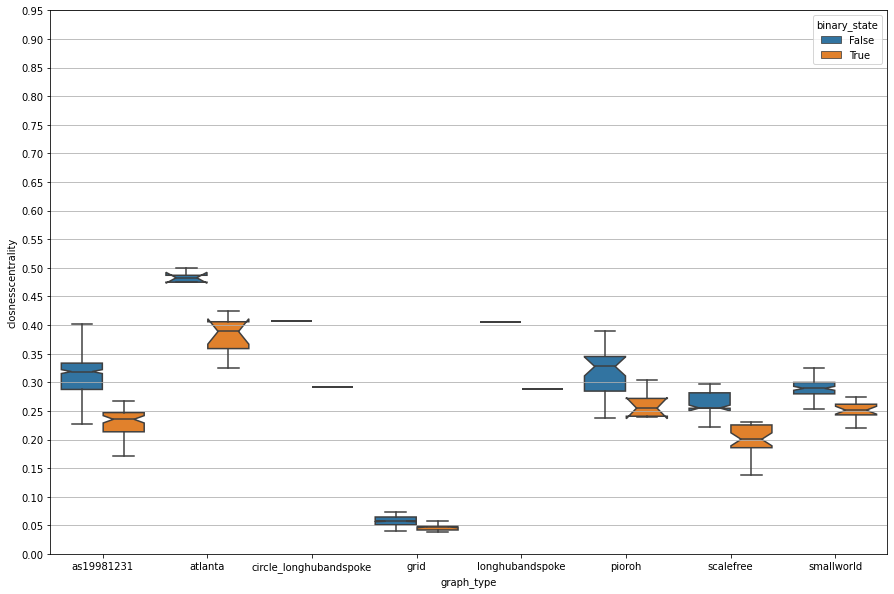

In [29]:
plt.figure(figsize=(15,10))
plt.grid()
sns.boxplot(
    data=df_joined,
    x='graph_type',
    y='closnesscentrality',
    hue='binary_state',
    showfliers=False,
    notch=True
)
plt.yticks(np.arange(0,1,0.05))
plt.show()

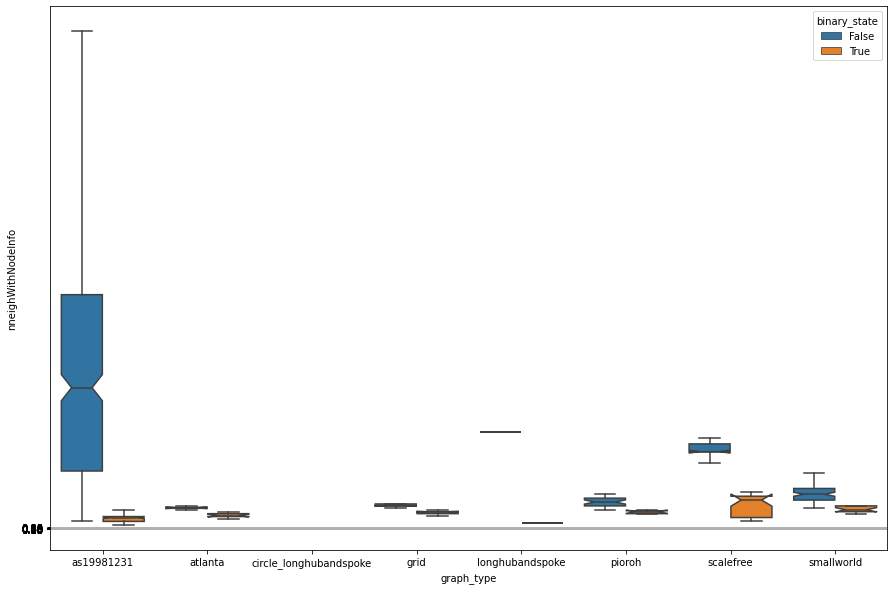

In [30]:
plt.figure(figsize=(15,10))
plt.grid()
sns.boxplot(
    data=df_joined,
    x='graph_type',
    y='nneighWithNodeInfo',
    hue='binary_state',
    showfliers=False,
    notch=True
)
plt.yticks(np.arange(0,1,0.05))
plt.show()

In [31]:
def scale_centered(group, column):
    scaled_data = RobustScaler().fit_transform(X=np.reshape(group[column].values, (-1, 1)))
    group[f'scaled_{column}'] = scaled_data.flatten()

# Ignorar esto, es muy engañoso

In [33]:
df_scaled = []
for group, values in df_joined.groupby('graph_type'):
    scale_centered(values, 'normclosnesscentrality')
    values['graph_type'] = group
    df_scaled.append(values)
df_scaled = pd.concat(df_scaled)

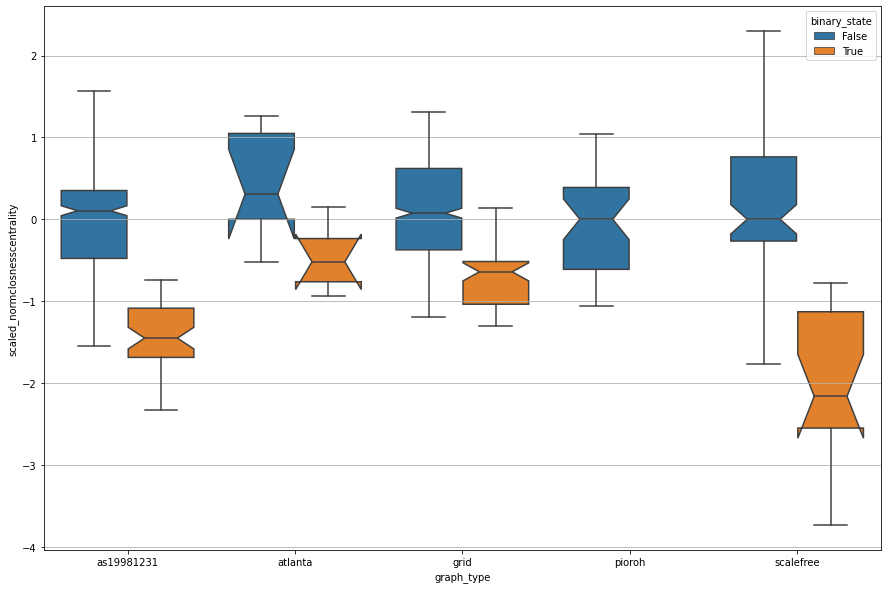

In [35]:
plt.figure(figsize=(15,10))
plt.grid()
sns.boxplot(
    data=df_scaled,
    x='graph_type',
    y='scaled_normclosnesscentrality',
    hue='binary_state',
    showfliers=False,
    notch=True
)
plt.show()

# Esto si puede servir

In [17]:
def calculate_KL(group, column):
    
    good_examples = group[
        group['binary_state'] == False
    ][column].tolist()
    
    bad_examples = group[
        group['binary_state'] == True
    ][column].tolist()
    
    print(good_examples)
    print(bad_examples)
    
    return entropy(good_examples, bad_examples)

In [18]:
for group, values in df_joined.groupby('graph_type'):
    print(group, calculate_KL(values, 'closnesscentrality'))

[0.4550311665182546, 0.3404397068620919, 0.3129210042865891, 0.3219911783238815, 0.2611139499233521, 0.2623203285420944, 0.2831024930747922, 0.318380062305296, 0.3261008296107211, 0.2632663575476558, 0.2831024930747922, 0.3070913461538461, 0.3207784055241682, 0.2716640085061138, 0.2883747178329571, 0.2623203285420944, 0.3181818181818182, 0.3469110658520027, 0.3138820638820638, 0.2689473684210526, 0.3027251184834123, 0.2925014310246136, 0.318380062305296, 0.3450371370695476, 0.314849044978435, 0.3261008296107211, 0.3187772925764192, 0.3195747342088805, 0.318380062305296, 0.35, 0.2883747178329571, 0.3261008296107211, 0.3538781163434903, 0.3307443365695792, 0.3318181818181818, 0.3469110658520027, 0.2631307929969104, 0.2735546038543897, 0.2734082397003745, 0.3450371370695476, 0.3427230046948357, 0.2933409873708381, 0.3226010101010101, 0.2831024930747922, 0.3368490441661173, 0.3553546592489569, 0.2716640085061138, 0.2964037122969837, 0.4004702194357367, 0.3361842105263158, 0.308388654194327

ValueError: shape mismatch: objects cannot be broadcast to a single shape